<a href="https://colab.research.google.com/github/jinia-konar/Predicting_Diabetes/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from numpy import loadtxt
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Predicting Diabetes/test.csv")
df=df.drop(columns=['Unnamed: 0'])
print(df.head())

   Pregnancies   Glucose  ...       Age  Outcome
0     1.827813  1.325390  ...  1.766346        0
1    -0.844885 -0.614370  ... -0.956462        0
2     0.342981 -0.877389  ... -0.531023        0
3    -1.141852  0.799353  ...  0.915469        0
4    -0.250952 -0.186965  ... -0.786286        0

[5 rows x 9 columns]


In [0]:
X = df.loc[:, df.columns!='Outcome']
Y = df.loc[:, 'Outcome']

In [0]:
json_file = open('/content/drive/My Drive/Colab Notebooks/Predicting Diabetes/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Colab Notebooks/Predicting Diabetes/model.h5")
print("Loaded model from disk")









Loaded model from disk


In [0]:
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
scores = loaded_model.evaluate(X,Y)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

154/154 [==============================] - 0s 96us/step
Testing Accuracy: 74.68%



Text(33.0, 0.5, 'Actual')

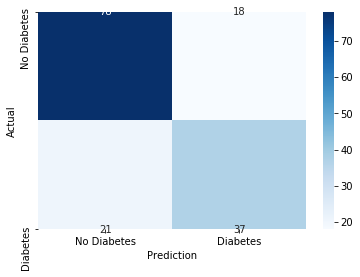

In [0]:
Y_pred = loaded_model.predict_classes(X)
c_matrix = confusion_matrix(Y,Y_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'], cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")